In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
devices_df = pd.read_csv("device_mapping_13681_studies_20241023_ext.csv", sep=";")

In [34]:
devices_df['device_key'] = devices_df.apply(lambda row: f"{row['Manufacturer']}_{row['ManufacturerModelName']}_{row['DeviceSerialNumber']}", axis=1)
# devices_df['device_key'] = devices_df.apply(lambda row: f"{row['ManufacturerModelName']}_{row['DeviceSerialNumber']}", axis=1)

In [35]:
len(devices_df['device_key'].unique())

674

In [60]:
classification_df = pd.read_csv("/home/oleksii/projects/ohif-orthanc-postgres-docker/datasets/classification/prostate_class_dataset_demography_final_psa_vol_20240919_feat.csv", sep=";")
devices_df = devices_df[devices_df['study_orthanc_id'].isin(classification_df['study_orthanc_id'])]

In [61]:
len(classification_df)

4486

In [62]:
# TODO; test all externen 

4486 - 1715 - 1373 - 807

591

First few rows of the DataFrame:
                               series_orthanc_id PatientID Manufacturer  \
5   f7606834-3ba96fba-38fd9e4d-5c1a6548-cb857377     32382      SIEMENS   
6   aba07d5b-834d4c29-11f8dcb2-f409bd25-1a7449e9     22520      SIEMENS   
8   3125769a-d10c6331-9ea5d72e-29225f32-46303794     32395      SIEMENS   
11  548680b9-39c6f96e-f8cd42c8-58d60daa-a91ee6fd     32402      SIEMENS   
26  62d81605-6173eb50-608336d6-34f602f3-78f2ed36     24705      SIEMENS   

   ManufacturerModelName SoftwareVersions DeviceSerialNumber  \
5                  Skyra     syngo MR E11             145132   
6                  Skyra     syngo MR E11             145132   
8                  Skyra     syngo MR E11             145132   
11                 Skyra     syngo MR E11             145132   
26                 Skyra     syngo MR E11             145132   

                               InstitutionName  \
5   ALTA Klinik Bielefeld, Dr. med. A. Lumiani   
6   ALTA Klinik Bielefeld, Dr. 

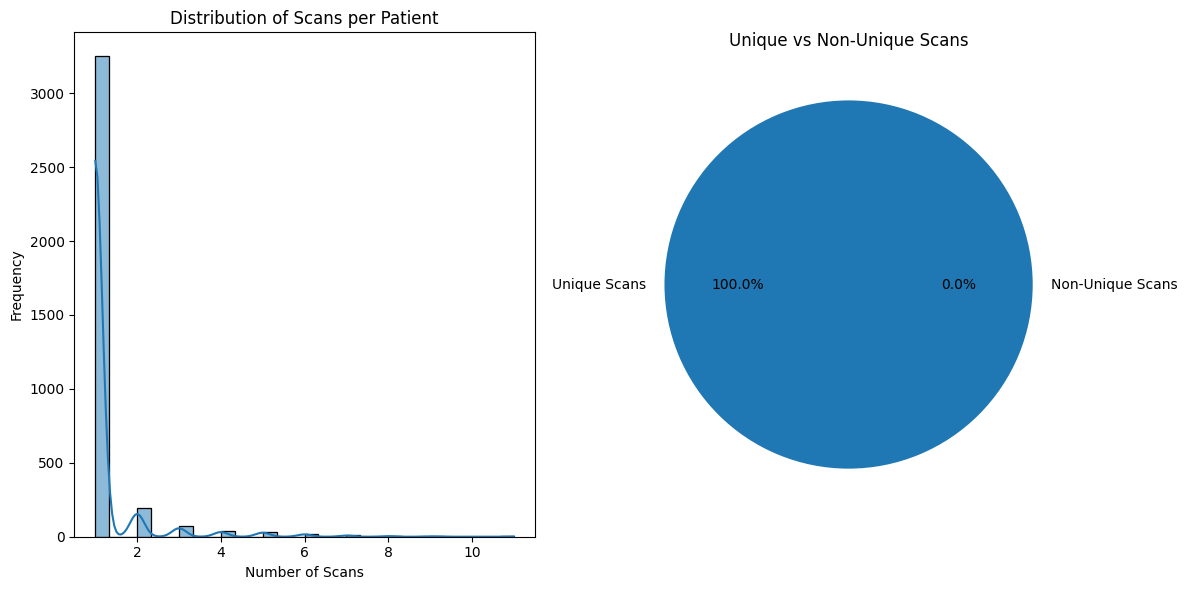

In [39]:


# Assuming devices_df is already loaded

# Basic Analysis
print("First few rows of the DataFrame:")
print(devices_df.head())

print("\nSummary statistics:")
print(devices_df.describe())

print("\nMissing values in each column:")
print(devices_df.isnull().sum())

# Patient Scan Analysis
# Assuming 'patient_id' and 'scan_id' are columns in devices_df
patient_scan_counts = devices_df['PatientID'].value_counts()
multiple_scans = patient_scan_counts[patient_scan_counts > 1].count()
unique_scans = devices_df['study_orthanc_id'].nunique()

print(f"\nNumber of patients with multiple scans: {multiple_scans}")
print(f"Number of unique scans: {unique_scans}")

# Visualization
plt.figure(figsize=(12, 6))

# Distribution of scans per patient
plt.subplot(1, 2, 1)
sns.histplot(patient_scan_counts, bins=30, kde=True)
plt.title('Distribution of Scans per Patient')
plt.xlabel('Number of Scans')
plt.ylabel('Frequency')

# Unique vs Non-Unique Scans
plt.subplot(1, 2, 2)
unique_vs_nonunique = [unique_scans, len(devices_df) - unique_scans]
plt.pie(unique_vs_nonunique, labels=['Unique Scans', 'Non-Unique Scans'], autopct='%1.1f%%')
plt.title('Unique vs Non-Unique Scans')

plt.tight_layout()
plt.show()

425


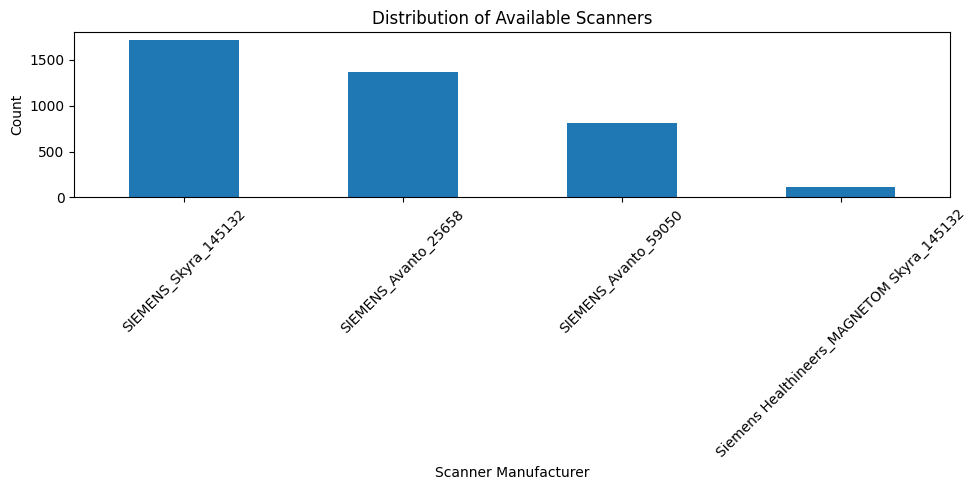

In [67]:
scanner_info = devices_df['device_key']

# Calculate Distribution
scanner_distribution = scanner_info.value_counts()

# Exclude cases where the occurrence is less than 5
filtered_distribution = scanner_distribution[scanner_distribution < 50]
rare_devices = devices_df[devices_df['device_key'].isin(filtered_distribution.index)]
print(len(rare_devices))

# Plot Distribution
plt.figure(figsize=(10, 5))
scanner_distribution[scanner_distribution > 50].plot(kind='bar')
plt.xlabel('Scanner Manufacturer')
plt.ylabel('Count')
plt.title('Distribution of Available Scanners')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
import re

# Function to extract city from address
def extract_city(address):
    if isinstance(address, str):
        try:
            # Split the address by commas and return the second element
            city = address.split(',')[1]
            # Strip white spaces and remove numbers
            city = re.sub(r'\d+', '', city).strip()
            return city
        except IndexError:
            # Handle edge cases where the address format is not as expected
            return "Unknown"
    else:
        # Handle cases where the address is not a string (e.g., NaN)
        return "Unknown"

# Function to extract country from address
def extract_country(address):
    if isinstance(address, str):
        try:
            # Split the address by commas and return the second last element
            country = address.split(',')[-2]
            # Strip white spaces and remove numbers
            country = re.sub(r'\d+', '', country).strip()
            return country
        except IndexError:
            # Handle edge cases where the address format is not as expected
            return "Unknown"
    else:
        # Handle cases where the address is not a string (e.g., NaN)
        return "Unknown"


# Apply the function to create a new column with the city
rare_devices['city'] = rare_devices['InstitutionAddress'].apply(extract_city)
rare_devices['country'] = rare_devices['InstitutionAddress'].apply(extract_country)

print("Unique cities:", len(rare_devices['city'].unique()))
print(rare_devices['country'].unique())
# [DE, AT, CH, FR]

Unique cities: 104
['DE' 'Unknown' 'AM' 'Sinsheim' 'AT' 'Oldenburger Str. a' 'CH' 'FR'
 'Eberbach']


/tmp/ipykernel_3961516/1272284992.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rare_devices['city'] = rare_devices['InstitutionAddress'].apply(extract_city)
/tmp/ipykernel_3961516/1272284992.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rare_devices['country'] = rare_devices['InstitutionAddress'].apply(extract_country)


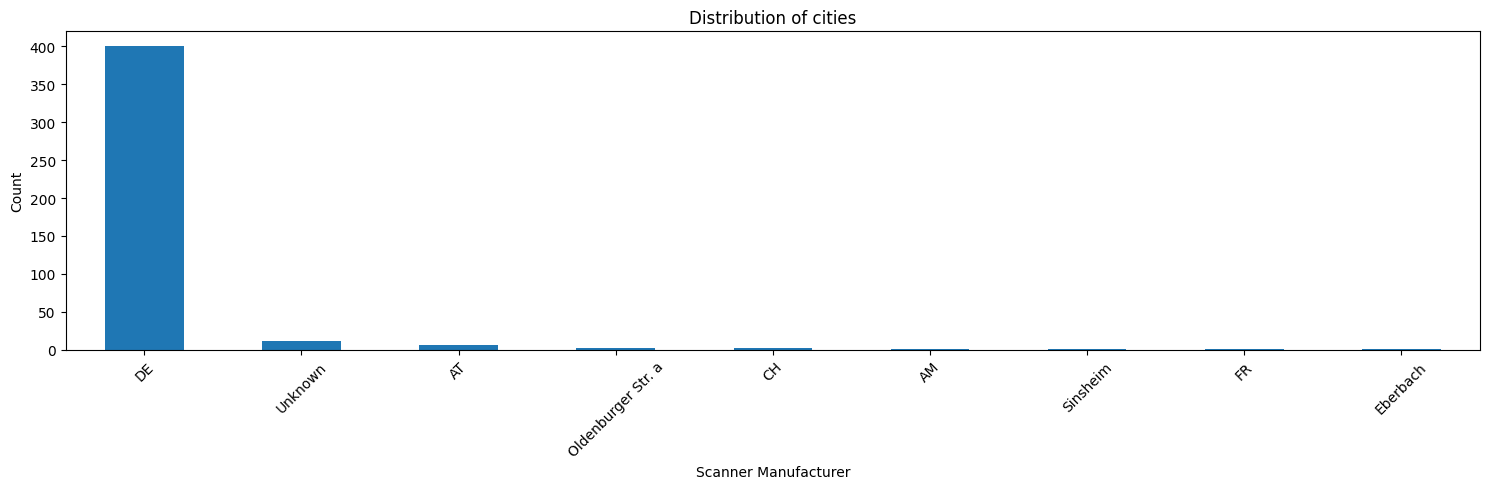

In [75]:

# Plot Distribution
plt.figure(figsize=(15, 5))
# rare_devices['city'].value_counts().plot(kind='bar')
rare_devices['country'].value_counts().plot(kind='bar')
plt.xlabel('Scanner Manufacturer')
plt.ylabel('Count')
plt.title('Distribution of cities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [69]:
rare_devices

,series_orthanc_id,PatientID,Manufacturer,ManufacturerModelName,SoftwareVersions,DeviceSerialNumber,InstitutionName,InstitutionAddress,StationName,InstitutionalDepartmentName,DeviceTimeOfLastCalibration,DateOfLastCalibration,study_orthanc_id,StudyDate,device_key
30,f31f71ef-60929664-7b66ab96-49da94c1-81c467dc,aaa284264611,SIEMENS,Skyra,syngo MR E11,145679,medneo Diagnostikzentrum Düsseldorf,"Berliner Allee 44,Duesseldorf,District,DE,40212",AWP145679,Department,NaN,NaN,e920547b-5fe23dbd-f640d511-39dbaab0-6e6766a9,20220209.0,SIEMENS_Skyra_145679
58,b585b155-a0adb88c-efb1ad02-bfc52504-f1683aea,216926,SIEMENS,SymphonyTim,syngo MR B19,37391,MEDPOL GmbH Jena,"Zeitzer Str. 20,Jena,OSTS,DE,07743",MRC37391,Department,NaN,NaN,c4d0dbaa-3015a927-63ed707e-ae99a6c0-a6ce66a3,20220202.0,SIEMENS_SymphonyTim_37391
59,cacafb51-b49bd326-31f0ddd4-6be8e494-1cb00655,C79322,SIEMENS,Verio,syngo MR B17,40769,NURAMED Klinik am Ring,"Hohenstaufenring 28,Koeln,District,DE,50674",MRC40769,Department,NaN,NaN,b8de4265-eb3f8d12-e39dd13e-f8f886db-d9cce4ff,20220202.0,SIEMENS_Verio_40769
68,7e6dd4b8-b74f4530-9ecf1e8d-b5df3b20-6c890a38,aaa251941318,SIEMENS,Skyra,syngo MR E11,145226,medneo Diagnostikzentrum Charlottenburg,"Marburgerstr. 12,Berlin,District,DE,10789",AWP145226,Department,NaN,NaN,b678d49c-06d5c166-9f563d82-69197613-19ced735,20220219.0,SIEMENS_Skyra_145226
84,6ba13287-bb73b8e9-96965f48-3263b0bd-51fd3433,212326,SIEMENS,Spectra,syngo MR E11,56014,Praxis Kuhn/Behrends/Wefer OL,"Gottorpstrasse 3,Oldenburg//,Nord,DE,26122",AWP56014,Department,NaN,NaN,2045deab-5e5d2e4e-f6d36d3c-73a4119e-ef7fb535,20220209.0,SIEMENS_Spectra_56014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13007,82bae88b-83e4dd02-0422c094-82c961cc-3f099672,60984706,Siemens Healthineers,MAGNETOM Vida,syngo MR XA50,176187,UKSH Campus Luebeck,"Ratzeburger Allee 160,Luebeck,Schleswig-Holts...",MR_3T,Radiologie,NaN,NaN,c19d6de4-31d2e449-e764cc96-93854802-ed611137,20230322.0,Siemens Healthineers_MAGNETOM Vida_176187
13008,dc6c9e4b-1a46c3ff-234619e1-75a5eff9-895199a0,6473503,Siemens,MAGNETOM Sola,syngo MR XA20,182631,Universitaetsklinikum,"Ernst-Grube-Str. 40,Halle,,DE,06120",RMR1P,NaN,NaN,NaN,b9b3a461-c2438c13-7023327f-cc77cd9f-40b1ec40,20230426.0,Siemens_MAGNETOM Sola_182631
13009,76b4f9f9-6cca27a3-49b873d4-c19f2108-a99b9e3d,2611039,Siemens Healthcare,syngo.via,VB60A_HF03,132051,Klinik Donaustadt,"Langobardenstrasse 122,Wien,,AT,1220",AWP145024,MR,NaN,NaN,93f8e150-bd34835b-b1b0d5e8-065bc6db-200ccb38,20230313.0,Siemens Healthcare_syngo.via_132051
13012,bfc89a99-ee553c62-cf98f143-2bd3d5e1-3681c08f,988360,SIEMENS,Verio,syngo MR B19,40431,RVZ Ostwestfalen,"Ringstrasse 44,Minden,District,DE,32427",MRC40431,Department,NaN,NaN,69b74237-8e96b57b-69dd667d-24583bdd-3eccb8f6,20230508.0,SIEMENS_Verio_40431


In [58]:
sum(scanner_distribution[scanner_distribution < 50])


425

In [72]:
print(f"Finall df will consist of {len(rare_devices)} cases...")
rare_devices.to_csv("external_rare_cases.csv", sep=";", index=False)


Finall df will consist of 425 cases...
